# Sử dụng Random Forest trong Python

- Quản Thành Thơ, Nguyễn Hữu Vũ 
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

In [1]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_filename = "bill_authentication.csv"

In [3]:

dataset = pd.read_csv(dataset_filename)

## 1) Phân tích dữ liệu

In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Overview about dataset
dataset.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [8]:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Visualization: Xác định quan hệ giữa các biến dữ liệu

**Sử dụng pairplot**

C:\Users\Huu Vu\Downloads\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Huu Vu\Downloads\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Huu Vu\Downloads\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


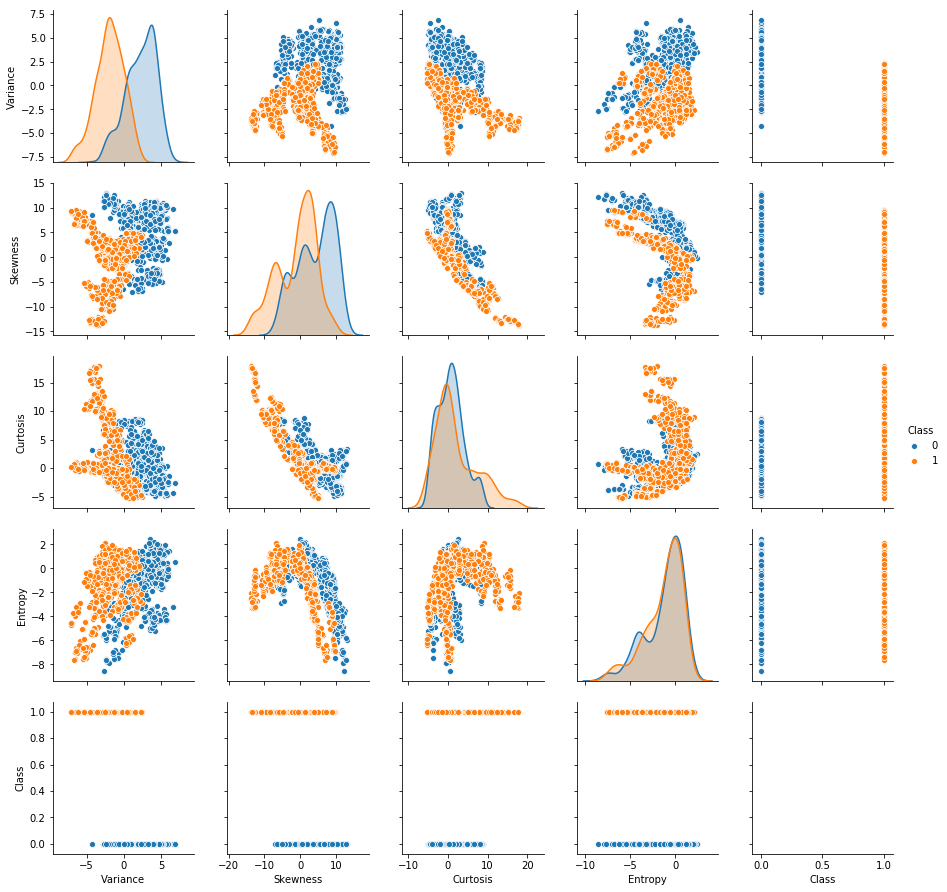

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(dataset, hue = 'Class', kind='scatter')
plt.show()

Nhìn vào 2 biểu đồ trên ta thấy 

**Sử dụng correlation table và heatmap**

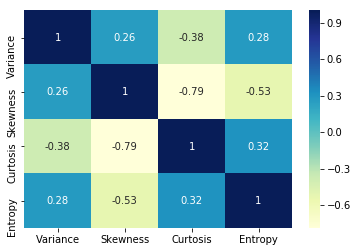

In [10]:
# Let's see the correlation between different variables.
sns.heatmap(dataset.drop('Class', axis = 1). corr(), cmap="YlGnBu", annot = True)
plt.show()

Nhìn vào 2 biểu đồ trên ta thấy `Curtosis` and `Skewness` có độ tương quan cao

### 2) Chuẩn bị training data và test data

##### Xác định `features` và `labels`

Trong dataset này, label của dữ liệu chính là giá trị trong cột **Class**

In [11]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

Chúng ta chia dataset thành 2 tập: training set and test set theo tỉ lện 80/20

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(1097, 4) 1097
(275, 4) (275,)


## 3) Xây dựng mô hình phân lớp  Random Forest

Chúng ta sẽ sử dụng  `RandomForestClassifier` của sklearn để xây dựng mô hình phân lớp Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier in which  number of trees is 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [14]:
# fit data to the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Xem xét kết quả trả về của mô hình

In [15]:
# Số class của random forest classifier
clf.n_classes_ 

2

In [16]:
# Labels của classifier
clf.classes_ 

array([0, 1], dtype=int64)

In [17]:
# Tổng số features đã được sử dụng để xây dựng classifier
clf.n_features_ 

4

### Prediction:

In [18]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Model Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[144   0]
 [  1 130]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       144
           1       1.00      0.99      1.00       131

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [20]:
y_test.values.shape

(275,)

In [21]:
y_pred.shape

(275,)

##### Tình accuracy bằng `accuracy_score`

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.values, y_pred)

0.9963636363636363

##### Sử dụng model để tính accuracy

In [23]:
# accuracy của model on testing set
accuracy_score = clf.score(X_test, y_test)
print(f"Random Forest classifier accuracy score for training set is {accuracy_score}")

Random Forest classifier accuracy score for training set is 0.9963636363636363


### Feature Importance

In [24]:
# Độ quan trọng của mỗi feature theo thứ tự
clf.feature_importances_

array([0.54017958, 0.23321692, 0.17345991, 0.05314359])

In [25]:
#Tạo Series object để thấy feature nào quan trọng
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Variance    0.540180
Skewness    0.233217
Curtosis    0.173460
Entropy     0.053144
dtype: float64

##### Visualize the feature importance

No handles with labels found to put in legend.


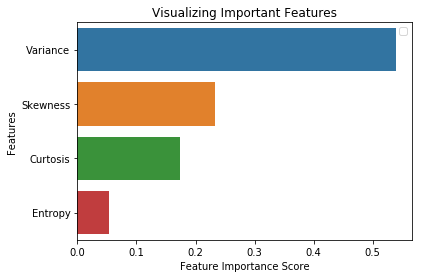

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Như vậy có thể thấy `Variance` là thuộc tính quan trọng nhất. Đồng thời, ta có thể thấy độ quan trọng của thuộc tính `Entropy` rất thấp, do đó ta có thể bỏ nó và chỉ sử dụng 3 features còn lại để xây dựng classifier

## 4) Xây dựng model dựa trên Selected Features

In [27]:
X_train

,Variance,Skewness,Curtosis,Entropy
783,0.47368,3.360500,-4.506400,-4.043100
714,2.55590,3.360500,2.032100,0.268090
909,-1.73220,-9.282800,7.719000,-1.716800
833,-2.82670,-9.040700,9.069400,-0.982330
1088,0.64376,3.764000,-4.473800,-4.048300
625,4.09480,-2.967400,2.368900,0.754290
164,4.88510,1.599500,-0.000291,1.640100
215,6.09190,2.967300,-1.326700,1.455100
750,4.04220,-4.391000,4.746600,1.137000
519,3.46690,6.870000,-1.056800,-0.731470


In [28]:
# bỏ cột 'Entropy', chỉ chọn 3 cột còn lại
X_train_selected = X_train.drop('Entropy', axis = 1)
X_test_selected = X_test.drop('Entropy', axis = 1)

In [29]:
X_train_selected

,Variance,Skewness,Curtosis
783,0.47368,3.360500,-4.506400
714,2.55590,3.360500,2.032100
909,-1.73220,-9.282800,7.719000
833,-2.82670,-9.040700,9.069400
1088,0.64376,3.764000,-4.473800
625,4.09480,-2.967400,2.368900
164,4.88510,1.599500,-0.000291
215,6.09190,2.967300,-1.326700
750,4.04220,-4.391000,4.746600
519,3.46690,6.870000,-1.056800


In [30]:
# Xây dựng classifer dựa trên X_train_selected (chỉ có 3 features)
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf2.fit(X_train_selected, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model Evaluation

In [31]:
# accuracy của model
accuracy_score = clf2.score(X_test_selected, y_test)
print(f"Random Forest classifier accuracy score is {accuracy_score}")

Random Forest classifier accuracy score is 0.9963636363636363


Có thể thấy sau khi loại bỏ thuộc tính `Entropy`, độ chính xác của model vẫn không thay đổi nhiều. Điều này được giải thích là do thuộc tính `Entropy` không quan trọng, nên ta có thể loại bỏ nó khi xây dựng model.